In [231]:
import numpy as np
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
%matplotlib inline

In [325]:
#Create the graph
A = nx.Graph()
for i in range(3):
    for j in range(3):
        A.add_node((i,j), pos=(i,j))
#Add some edges
A.add_edge((0,0),(1,0),weight=5)
A.add_edge((0,0),(1,0),weight=2)
A.add_edge((0,0),(1,2),weight=4)
A.add_edge((0,0),(2,2),weight=4)
A.add_edge((1,0),(0,2),weight=5)
A.add_edge((1,0),(2,1),weight=2)
A.add_edge((2,0),(0,1),weight=3)
A.add_edge((2,0),(2,1),weight=1)
A.add_edge((1,1),(2,1),weight=3)
A.add_edge((1,1),(2,2),weight=6)
A.add_edge((2,1),(2,2),weight=2)
A.add_edge((0,2),(1,2),weight=3)


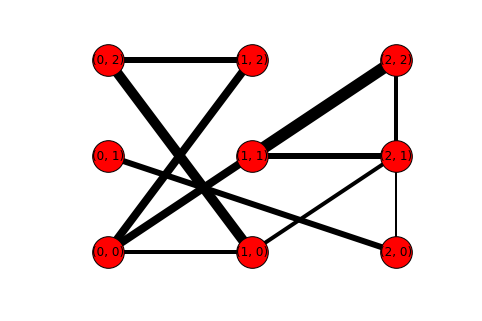

In [326]:
#Plot the graph
G = A
pos=nx.get_node_attributes(G,'pos')
edges = G.edges()
weights = [G[u][v]['weight']*2 for u,v in edges] #divide by 4 for scale in graphing
nx.draw(G, pos, edges=edges, width=weights, node_size=1000)
nx.draw_networkx_labels(G,pos)
plt.show()

In [327]:
def step(x):
    if x > 0: return x
    else: return 0

In [328]:
#Create a BiPartite Graph
del B
B = nx.Graph()
#Add the nodes
B.add_nodes_from(A.nodes(data=True),bipartite=0)
B.nodes(data=True)
#Add the nodes (that are actually edges)
for edge in A.edges(data=True):
    #Extract the points
    P0 = edge[0]
    P1 = edge[1]
    #Find the distance between the points in each direction
    D = [abs(P0[0]-P1[0]), abs(P0[1]-P1[1])]
    #Find the L1 between the two points (manhattan distance)
    L1 = sum(D)
    #If the distance between the two points is only 1, no node should be added
    if L1 > 1:
        #Create a list of the divisiors
        divisors = [a+1 - step(a-D[0]) - step(a-D[1]) for a in range(L1+1)]
        #Add a second type of node for the connection
        B.add_node((P0,P1),bipartite=1)
        #Add edges for the type 0 nodes
        for i in range(min(P0[0],P1[0]),max(P0[0],P1[0])+1):
            for j in range(min(P0[1],P1[1]),max(P0[1],P1[1])+1):
                #Connections to the endpoints should noe be added
                if (i,j)!=P0 and (i,j)!=P1:
                    B.add_edge((P0,P1),(i,j),weight=float(edge[2]['weight'])/divisors[abs(P0[0]-i)+abs(P0[1]-j)])
print(B.edges(data=True))

[((0, 1), ((0, 0), (2, 2)), {'weight': 2.0}), ((0, 1), ((1, 2), (0, 0)), {'weight': 2.0}), ((0, 1), ((1, 0), (0, 2)), {'weight': 2.5}), ((1, 2), ((0, 0), (2, 2)), {'weight': 2.0}), ((1, 2), ((1, 0), (0, 2)), {'weight': 2.5}), ((1, 2), ((1, 1), (2, 2)), {'weight': 3.0}), ((0, 0), ((0, 1), (2, 0)), {'weight': 1.5}), ((0, 0), ((1, 0), (0, 2)), {'weight': 2.5}), (((0, 0), (2, 2)), (2, 1), {'weight': 2.0}), (((0, 0), (2, 2)), (1, 1), {'weight': 1.3333333333333333}), (((0, 0), (2, 2)), (2, 0), {'weight': 1.3333333333333333}), (((0, 0), (2, 2)), (1, 0), {'weight': 2.0}), (((0, 0), (2, 2)), (0, 2), {'weight': 1.3333333333333333}), (((1, 0), (0, 2)), (1, 1), {'weight': 2.5}), ((2, 1), ((0, 1), (2, 0)), {'weight': 1.5}), ((2, 1), ((1, 1), (2, 2)), {'weight': 3.0}), ((0, 2), ((1, 2), (0, 0)), {'weight': 2.0}), (((0, 1), (2, 0)), (1, 0), {'weight': 1.5}), (((0, 1), (2, 0)), (1, 1), {'weight': 1.5}), ((2, 0), ((2, 1), (1, 0)), {'weight': 1.0}), (((2, 1), (1, 0)), (1, 1), {'weight': 1.0}), (((1, 2),

In [333]:
print B.nodes(data=True)

[((0, 1), {'bipartite': 0, 'pos': (0, 1)}), ((1, 2), {'bipartite': 0, 'pos': (1, 2)}), ((0, 0), {'bipartite': 0, 'pos': (0, 0)}), (((0, 0), (2, 2)), {'bipartite': 1}), (((1, 0), (0, 2)), {'bipartite': 1}), ((2, 1), {'bipartite': 0, 'pos': (2, 1)}), ((0, 2), {'bipartite': 0, 'pos': (0, 2)}), (((0, 1), (2, 0)), {'bipartite': 1}), ((2, 0), {'bipartite': 0, 'pos': (2, 0)}), (((2, 1), (1, 0)), {'bipartite': 1}), (((1, 1), (2, 2)), {'bipartite': 1}), ((2, 2), {'bipartite': 0, 'pos': (2, 2)}), (((1, 2), (0, 0)), {'bipartite': 1}), ((1, 0), {'bipartite': 0, 'pos': (1, 0)}), ((1, 1), {'bipartite': 0, 'pos': (1, 1)})]


set([(0, 1), (1, 2), (0, 0), (2, 1), (1, 1), (2, 0), (1, 0), (0, 2)])
set([((0, 0), (2, 2)), ((1, 0), (0, 2)), ((1, 1), (2, 2)), ((0, 1), (2, 0)), ((2, 1), (1, 0)), (2, 2), ((1, 2), (0, 0))])


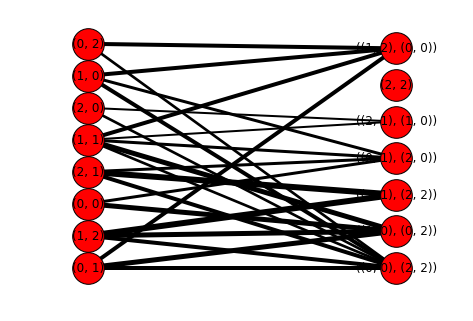

In [334]:
#Display the bipartite graph
G=B
X, Y = bipartite.sets(G)
print(X)
print(Y)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
yscale = float(len(X))/len(Y) #Scale for graphic purposes
pos.update( (n, (2, i*yscale)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

edges = G.edges()
weights = [G[u][v]['weight']*2 for u,v in edges] #divide by 4 for scale in graphing
nx.draw(G, pos=pos, edges=edges, width=weights, node_size=1000)
nx.draw_networkx_labels(G,pos=pos)
plt.show()
#Why is 2,2 showing in the right column!?

In [316]:
#Display the bipartite graph as a data table
from pandas import DataFrame 
columnOrder = [(i,j) for i in range(3) for j in range(3)]
rowOrder = [node[0] for node in B.nodes(data=True) if node[1]['bipartite']==1]
BA = bipartite.biadjacency_matrix(B,rowOrder)
BA = BA.todense()
BA = np.around(BA,1)
BA = DataFrame(BA,rowOrder,columnOrder)
print(BA)


                  (0, 0)  (0, 1)  (0, 2)  (1, 0)  (1, 1)  (1, 2)  (2, 0)  \
((0, 0), (2, 2))     2.0     2.0     0.0     2.0     1.3     1.3     0.0   
((1, 0), (0, 2))     2.5     2.5     2.5     0.0     0.0     0.0     0.0   
((0, 1), (2, 0))     0.0     0.0     1.5     1.5     0.0     0.0     0.0   
((2, 1), (1, 0))     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
((1, 1), (2, 2))     0.0     3.0     0.0     3.0     0.0     0.0     0.0   
((1, 2), (0, 0))     2.0     0.0     0.0     0.0     2.0     0.0     0.0   

                  (2, 1)  (2, 2)  
((0, 0), (2, 2))     2.0     1.3  
((1, 0), (0, 2))     0.0     2.5  
((0, 1), (2, 0))     1.5     1.5  
((2, 1), (1, 0))     0.0     1.0  
((1, 1), (2, 2))     0.0     0.0  
((1, 2), (0, 0))     2.0     2.0  


In [348]:
#Find how many edges pass through each node
locations = [node[0] for node in B.nodes(data=True) if node[1]['bipartite']==0]
bipartite.degree_centrality(B,locations)
_,kthrough = bipartite.degrees(B,locations,weight='weight')
#print(kthrough)
#Find how many edges end on each node
kend = A.degree(weight='weight')
#print(kend)
#Normalize each of entities and add together
locations = [(i,j) for i in range(3) for j in range(3)]
print(locations)
#Calculate the normalized through
kthrough = [kthrough[loc] for loc in locations]
m = max(kthrough)
kthrough = [float(v)/m for v in kthrough]
print('through:',kthrough)
#Calculate the normalized end
kend = [kend[loc] for loc in locations]
m = max(kend)
kend = [float(v)/m for v in kend]
print('end:',kend)
#Calculate the score
score = [round(b-a,4) for a,b in zip(kthrough,kend)]
print(score)

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
('through:', [0.4800000000000001, 0.7800000000000001, 0.4, 0.6600000000000001, 1.0, 0.9000000000000001, 0.28, 0.7800000000000001, 0.0])
('end:', [0.8333333333333334, 0.25, 0.6666666666666666, 0.75, 0.75, 0.5833333333333334, 0.3333333333333333, 0.6666666666666666, 1.0])
[0.3533, -0.53, 0.2667, 0.09, -0.25, -0.3167, 0.0533, -0.1133, 1.0]
